# **Paso 4: Análisis exploratorio de datos - Compañias de taxis**

## **4.1 Diccionario de datos**

Además de los datos que recuperaste en las tareas anteriores te han dado un segundo archivo. Ahora tienes estos dos CSV:

**/datasets/project_sql_result_01.csv. contiene los siguientes datos:**

- company_name: nombre de la empresa de taxis

- trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 

**/datasets/project_sql_result_04.csv. contiene los siguientes datos:**

- dropoff_location_name: barrios de Chicago donde finalizaron los viajes

- average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

## **4.2 Etapas**

- Importar los archivos
- Estudiar los datos que contienen
- Realizar los ajustes ques sean necesarios de las bases de datos
- Asegurarte de que los tipos de datos sean correctos
- Identificar los 10 principales barrios en términos de finalización del recorrido
- Análisis gráfico: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
- Conclusiones basadas en cada gráfico y explicar los resultados

## **4.3 Objetivo:**

Identificar los barrios mas productivos para las compañias de taxis.

## **4.4 Revisión de las bases de datos**

### **4.4.1 Carga de librerias**

In [1]:
# Cargar todas las librerías

try:

    import pandas as pd
    import numpy as np
    import seaborn as sns
    from math import factorial
    from scipy import stats as st
    from matplotlib import pyplot as plt
    print('Librerías cargadas correctamente')

except Exception as error:

    print('Error al cargar las librerías:\n\n', error)

Librerías cargadas correctamente


### **4.4.2 Carga de bases de datos**

In [2]:
# Carga de las bases de datos

try:

    compañia_viajes = pd.read_csv('moved_project_sql_result_01.csv')
    print('Dataframe "compañia_viajes" cargados correctamente')
    barrios_viajes = pd.read_csv('moved_project_sql_result_04.csv')
    print('Dataframe "barrios_viajes" cargados correctamente')

except:
    print('Error al cargar los datos')

Dataframe "compañia_viajes" cargados correctamente
Dataframe "barrios_viajes" cargados correctamente


### **4.4.3 Revisión de los datos**

#### **Revisión DataFrame "compañia_viajes"**

In [29]:
# Info

print('Info DatFrame "compañia_viajes":')
print()
print(compañia_viajes.info())

Info DatFrame "compañia_viajes":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


In [4]:
# Muestra de los datos del DataFrame

print('Muestra de los datos del DataFrame "compañia_viajes":')
print()
print(compañia_viajes.head(10))

Muestra de los datos del DataFrame "compañia_viajes":

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


In [5]:
# Valores únicos del DataFrame

print('Valores únicos del DataFrame "compañia_viajes":')
print()
print(compañia_viajes['company_name'].unique())

Valores únicos del DataFrame "compañia_viajes":

['Flash Cab' 'Taxi Affiliation Services' 'Medallion Leasin' 'Yellow Cab'
 'Taxi Affiliation Service Yellow' 'Chicago Carriage Cab Corp'
 'City Service' 'Sun Taxi' 'Star North Management LLC'
 'Blue Ribbon Taxi Association Inc.' 'Choice Taxi Association'
 'Globe Taxi' 'Dispatch Taxi Affiliation' 'Nova Taxi Affiliation Llc'
 'Patriot Taxi Dba Peace Taxi Associat' 'Checker Taxi Affiliation'
 'Blue Diamond' 'Chicago Medallion Management' '24 Seven Taxi'
 'Chicago Medallion Leasing INC' 'Checker Taxi' 'American United'
 'Chicago Independents' 'KOAM Taxi Association' 'Chicago Taxicab'
 'Top Cab Affiliation' 'Gold Coast Taxi' 'Service Taxi Association'
 '5 Star Taxi' '303 Taxi' 'Setare Inc' 'American United Taxi Affiliation'
 'Leonard Cab Co' 'Metro Jet Taxi A' 'Norshore Cab'
 '6742 - 83735 Tasha ride inc' '3591 - 63480 Chuks Cab'
 '1469 - 64126 Omar Jada' '6743 - 78771 Luhak Corp'
 '0118 - 42111 Godfrey S.Awir' '6574 - Babylon Express Inc.'
 '

In [6]:
# Valores ausentes del DataFrame

print('Valores ausentes del DataFrame "compañia_viajes":')
print()
print(compañia_viajes.isna().sum())

Valores ausentes del DataFrame "compañia_viajes":

company_name    0
trips_amount    0
dtype: int64


In [7]:
# Valores dupliados del DataFrame

print('Valores duplicados del DataFrame "compañia_viajes":')
print()
print(compañia_viajes.duplicated().sum())

Valores duplicados del DataFrame "compañia_viajes":

0


**Observaciones del dataset:**

* 2 columnas, con estilo snake_case.
* 64 filas, sin datos ausentes.
* Se revisaron los valores únicos de las columna "company_name", no se encontraron valores erroneos.

#### **Revisión DataFrame "barrios_viajes"**

In [30]:
# Info

print('Info DatFrame "barrios_viajes":')
print()
print(barrios_viajes.info())

Info DatFrame "barrios_viajes":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [9]:
# Muestra de los datos del DataFrame

print('Muestra de los datos del DataFrame "barrios_viajes":')
print()
print(barrios_viajes.head(10))

Muestra de los datos del DataFrame "barrios_viajes":

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


In [10]:
# Valores únicos del DataFrame

print('Valores únicos del DataFrame "barrios_viajes":')
print()
print(barrios_viajes['dropoff_location_name'].unique())

Valores únicos del DataFrame "barrios_viajes":

['Loop' 'River North' 'Streeterville' 'West Loop' "O'Hare" 'Lake View'
 'Grant Park' 'Museum Campus' 'Gold Coast' 'Sheffield & DePaul'
 'Lincoln Park' 'East Village' 'Little Italy, UIC' 'Uptown'
 'Near South Side' 'Garfield Ridge' 'Logan Square' 'Edgewater' 'West Town'
 'Old Town' 'Rush & Division' 'North Center' 'Lincoln Square'
 'Rogers Park' 'West Ridge' 'Irving Park' 'Hyde Park' 'Avondale'
 'Wicker Park' 'Albany Park' 'United Center' 'Lower West Side' 'Douglas'
 'Portage Park' 'Humboldt Park' 'Norwood Park' 'Kenwood' 'Bridgeport'
 'Armour Square' 'Jefferson Park' 'Bucktown' 'North Park' 'Garfield Park'
 'Mckinley Park' 'Belmont Cragin' 'Boystown' 'Chinatown' 'Grand Boulevard'
 'Austin' 'Sauganash,Forest Glen' 'South Shore' 'Woodlawn'
 'Little Village' 'Jackson Park' 'North Lawndale' 'Dunning'
 'Ukrainian Village' 'Hermosa' 'Englewood' 'Chatham' 'New City'
 'Grand Crossing' 'Brighton Park' 'Andersonville' 'Oakland' 'Ashburn'
 'Washingt

In [11]:
# Valores ausentes del DataFrame

print('Valores ausentes del DataFrame "barrios_viajes":')
print()
print(barrios_viajes.isna().sum())

Valores ausentes del DataFrame "barrios_viajes":

dropoff_location_name    0
average_trips            0
dtype: int64


In [12]:
# Valores duplicados del DataFrame

print('Valores duplicados del DataFrame "compañia_viajes":')
print()
print(barrios_viajes.duplicated().sum())

Valores duplicados del DataFrame "compañia_viajes":

0


**Observaciones del dataset:**

* 2 columnas, con estilo snake_case.
* Tipos de datos correctos.
* 94 filas, sin datos ausentes.
* Se revisaron los valores únicos de las columna "dropoff_location_name", no se encontraron valores erroneos.

## **4.5 Análisis de las bases de datos**

### **4.5.1 Top 10 barrios en términos de finalización.**

In [31]:
# Top 10 barrios en terminos de finalización de viajes

top_10_barrios = round(barrios_viajes.pivot_table(index='dropoff_location_name', values='average_trips', aggfunc='sum').sort_values(by='average_trips', ascending=False),2)

print('Top 10 barrios en términos de finalización de viajes:')
print()
print(top_10_barrios.head(10))

Top 10 barrios en términos de finalización de viajes:

                       average_trips
dropoff_location_name               
Loop                        10727.47
River North                  9523.67
Streeterville                6664.67
West Loop                    5163.67
O'Hare                       2546.90
Lake View                    2420.97
Grant Park                   2068.53
Museum Campus                1510.00
Gold Coast                   1364.23
Sheffield & DePaul           1259.77


Text(0, 0.5, 'Promedio de viajes')

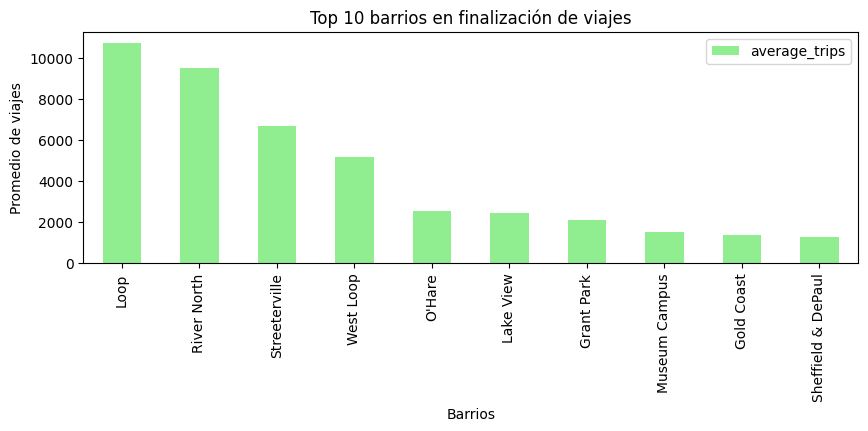

In [14]:
# Gráfica top 10 barrios en finalización de viajes

top_10_barrios.head(10).plot(kind='bar', figsize=(10,3), color='lightgreen')
plt.title('Top 10 barrios en finalización de viajes')
plt.xlabel('Barrios')
plt.ylabel('Promedio de viajes')

**Conclusiones del gráfico**

- La mayor cantidad de viajes promedio se realizan al barrio "Loop", con más de 10,000 viajes acumulados.
- El barrio "Loop" debe de ser una ruta destino para cualquier compañía de taxis, ya que presenta una demanda considerable de servicios.
- El segundo barrio con mas servicios de taxi es "River North", con 1,200 viajes promedio menos que a "Loop".
- A partit del tercer barrio ("Streeterville") en orden descendente de viajes promedio, existe una diferencia considerable con poco más de 2,900 viajes de diferencia contra el segundo barrio ("River North").
- El resto de los barrios son destinos con menor afluencia de viajes destino.
 

### **4.5.2 Empresas de taxis y número de viajes.**

In [15]:
# Empresas de viajes y número de viajes

viajes_compañias = round(compañia_viajes.pivot_table(index='company_name',
                       values='trips_amount', aggfunc='sum').sort_values(by='trips_amount', ascending=False), 2)

print('Viajes por cada empresa:')
print()
print(viajes_compañias)

Viajes por cada empresa:

                                           trips_amount
company_name                                           
Flash Cab                                         19558
Taxi Affiliation Services                         11422
Medallion Leasin                                  10367
Yellow Cab                                         9888
Taxi Affiliation Service Yellow                    9299
...                                                 ...
2733 - 74600 Benny Jona                               7
4053 - 40193 Adwar H. Nikola                          7
5874 - 73628 Sergey Cab Corp.                         5
2241 - 44667 - Felman Corp, Manuel Alonso             3
3556 - 36214 RC Andrews Cab                           2

[64 rows x 1 columns]


In [16]:
# Top 10 Empresas de viajes y número de viajes

viajes_compañias = round(compañia_viajes.pivot_table(index='company_name', 
                                                     values='trips_amount', aggfunc='sum').sort_values(by='trips_amount', ascending=False), 2)

print('Viajes por cada empresa:')
print()
print(viajes_compañias.head(10))

Viajes por cada empresa:

                                   trips_amount
company_name                                   
Flash Cab                                 19558
Taxi Affiliation Services                 11422
Medallion Leasin                          10367
Yellow Cab                                 9888
Taxi Affiliation Service Yellow            9299
Chicago Carriage Cab Corp                  9181
City Service                               8448
Sun Taxi                                   7701
Star North Management LLC                  7455
Blue Ribbon Taxi Association Inc.          5953


Text(0, 0.5, 'Viajes')

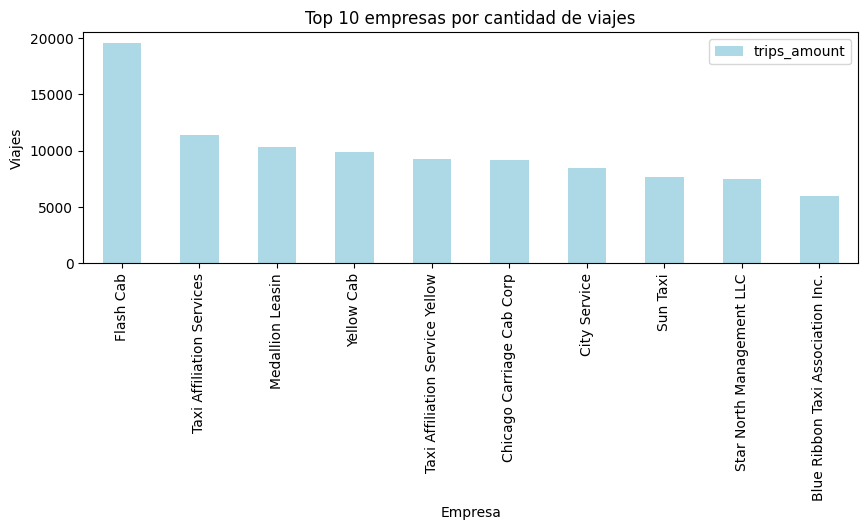

In [17]:
# Gráfica top 10 empresas por cantidad de viajes

viajes_compañias.head(10).plot(kind='bar', figsize=(10, 3), color='lightblue')
plt.title('Top 10 empresas por cantidad de viajes')
plt.xlabel('Empresa')
plt.ylabel('Viajes')

In [18]:
# % de viajes por cada empresa

viajes_compañias['%_viajes'] = round(viajes_compañias['trips_amount'] / viajes_compañias['trips_amount'].sum() * 100, 2)

print('Porcentaje de viajes por cada empresa:')
print()
print(viajes_compañias)

Porcentaje de viajes por cada empresa:

                                           trips_amount  %_viajes
company_name                                                     
Flash Cab                                         19558     14.24
Taxi Affiliation Services                         11422      8.32
Medallion Leasin                                  10367      7.55
Yellow Cab                                         9888      7.20
Taxi Affiliation Service Yellow                    9299      6.77
...                                                 ...       ...
2733 - 74600 Benny Jona                               7      0.01
4053 - 40193 Adwar H. Nikola                          7      0.01
5874 - 73628 Sergey Cab Corp.                         5      0.00
2241 - 44667 - Felman Corp, Manuel Alonso             3      0.00
3556 - 36214 RC Andrews Cab                           2      0.00

[64 rows x 2 columns]


,**Conclusiones del gráfico**

- La compañía "Flash Cab" es la compañía que realiza más viajes, con 19,558 viajes que representan el 14.24% del total de los viajes.
- La segunda compañía "Taxi Affiliation Services" realiza alrededor de 8,000 viajes menos que "Flash Cab" y cuenta con el 8.32% de los viajes.
- El top 3 de empresas realizan más de 10,000 viajes.
- A partir del 4to lugar ("Medallion Leasin"), las empresas realizan menos de 10,000 viajes.
- Existen compañias que realizan menos de 10 viajes.

# **Paso 5: Prueba de hipótesis** 

## **5.1 Diccionario de datos**

Archivo: project_sql_result_07.csv

Contiene el resultado de la última consulta. 
Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. 

Valores de los campos de la tabla:

* start_ts: fecha y hora de recogida.
* weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje.
* duration_seconds: duración del viaje en segundos.

## **5.2 Análisis de la base de datos**

In [32]:
# Importar Dataframe

try:

    viajes_sabados = pd.read_csv('moved_project_sql_result_07.csv')
    print('Dataframe "viajes_sabados" cargados correctamente')

except:
    print('Error al cargar los datos')

Dataframe "viajes_sabados" cargados correctamente


In [33]:
# Info de DataFrame

print('Info DatFrame "viajes_sabados":')
print()
print(viajes_sabados.info())

Info DatFrame "viajes_sabados":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None


In [21]:
# Valores ausentes del DataFrame

print('Valores ausentes:', viajes_sabados.isna().sum())

Valores ausentes: start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


## **5.3 Prueba de hipótesis**

### **5.3.1 Definición de hipótesis nula e hipótesis alternativa**

* **Hipótesis Nula:** "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare **NO** cambia los sábados lluviosos".

* **Hipótesis alternativa:** "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare **CAMBIA** los sábados lluviosos".

La hipótesis nula se formula asumiendo que la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual los sábados lluviosos que cuando no llueve (no hay cambios entre las dos variables). 

La hipótesis alternativa establece la posible variación.

Se aplica una prueba de Levene para verificar la diferencia entre las varianzas.

Se define una prueba de dos colas de variables independientes ya que ninguna variable tiene influencia sobre la otra.

In [22]:
# Filtro de datos para definir las dos variables: sábados con lluvia y sábados sin lluvia

sabado_lluvioso = viajes_sabados[viajes_sabados['weather_conditions']=='Bad']

print('Muestra "Sábados lluviosos":')
print()
print(sabado_lluvioso.head())

print()

sabado_sin_lluvia = viajes_sabados[viajes_sabados['weather_conditions']=='Good']

print('Muestra "Sábados sin_lluvia":')
print()
print(sabado_sin_lluvia.head())


Muestra "Sábados lluviosos":

               start_ts weather_conditions  duration_seconds
6   2017-11-04 16:00:00                Bad            2969.0
30  2017-11-18 12:00:00                Bad            1980.0
34  2017-11-04 17:00:00                Bad            2460.0
51  2017-11-04 16:00:00                Bad            2760.0
52  2017-11-18 12:00:00                Bad            2460.0

Muestra "Sábados sin_lluvia":

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


In [23]:
# Estádisticas básicas de variables

print('Estádisticas básicas "sabado_lluvioso":')
print()

print(sabado_lluvioso.describe())
print()

print('Estádisticas básicas "sabado_sin_lluvia":')
print()

print(sabado_sin_lluvia.describe())
print()

Estádisticas básicas "sabado_lluvioso":

       duration_seconds
count        180.000000
mean        2427.205556
std          721.314138
min          480.000000
25%         1962.000000
50%         2540.000000
75%         2928.000000
max         4980.000000

Estádisticas básicas "sabado_sin_lluvia":

       duration_seconds
count        888.000000
mean        1999.675676
std          759.198268
min            0.000000
25%         1389.750000
50%         1800.000000
75%         2460.000000
max         7440.000000



In [24]:
# Viajes con duración 0 en sábados sin lluvia

viajes_0 = sabado_sin_lluvia[sabado_sin_lluvia['duration_seconds']==0]

print('Viajes con duración 0 en "sabado_sin_lluvia":')
print(viajes_0.count())

Viajes con duración 0 en "sabado_sin_lluvia":
start_ts              6
weather_conditions    6
duration_seconds      6
dtype: int64


In [25]:
# Varianzas de variables

print('Varianza de la variable "sabado_lluvioso":', np.var(sabado_lluvioso['duration_seconds']))

print()

print('Varianza de la variable "sabado_sin_lluvia":',
      np.var(sabado_sin_lluvia['duration_seconds']))

Varianza de la variable "sabado_lluvioso": 517403.56330246915

Varianza de la variable "sabado_sin_lluvia": 575732.9308497686


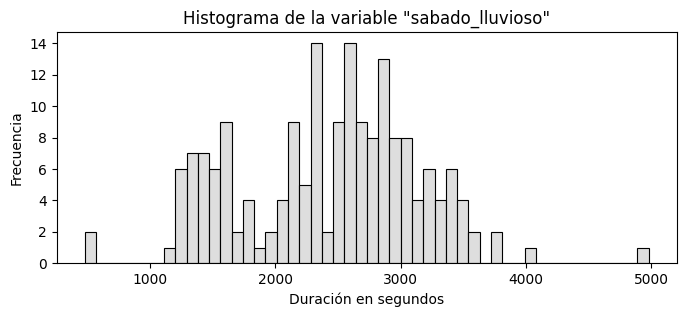

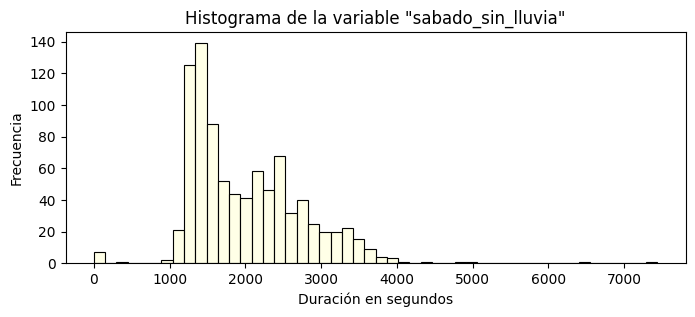

In [26]:
# Histograma de variables

plt.figure(figsize=(8, 3))
sns.histplot(sabado_lluvioso['duration_seconds'], color='lightgray', bins=50)
plt.title('Histograma de la variable "sabado_lluvioso"')
plt.xlabel('Duración en segundos')
plt.ylabel('Frecuencia')

plt.figure(figsize=(8, 3))
sns.histplot(sabado_sin_lluvia['duration_seconds'], color='lightyellow', bins=50)
plt.title('Histograma de la variable "sabado_sin_lluvia"')
plt.xlabel('Duración en segundos')
plt.ylabel('Frecuencia')

plt.show()

In [27]:
# Prueba de Levene de igualdad de varianzas

print('Prueba de Levene para comparación de varianzas:')

print()

alpha = 0.05  # Nivel de significancia

# Realizar la prueba
stat, p = st.levene(sabado_lluvioso['duration_seconds'], sabado_sin_lluvia['duration_seconds'])

# Imprimir los resultados
print('Estadístico de prueba:', stat)
print('Valor p:', p)

# Si el valor p es menor que un nivel de significancia predefinido (por ejemplo, 0.05), se rechaza la hipótesis nula y se concluye que las varianzas son significativamente diferentes.

if p < alpha:
    print('Las varianzas son significativamente diferentes')
else:
    print('Las varianzas NO son significativamente diferentes')

Prueba de Levene para comparación de varianzas:

Estadístico de prueba: 0.38853489683656073
Valor p: 0.5332038671974493
Las varianzas NO son significativamente diferentes


In [28]:
# Prueba de hipótesis

# Las varianzas NO son diferentes

stat, p = st.ttest_ind(
    sabado_lluvioso['duration_seconds'], sabado_sin_lluvia['duration_seconds'], equal_var=True)

print('Estadístico de prueba:', stat)
print('Valor p:', p)
print()

# Si el "valor p" es menor a "alpha" rechazaremos la hipótesis

if p < alpha:
    print("Rechazamos la hipótesis nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare NO cambia los sábados lluviosos")
else:
    print("No podemos rechazar la hipótesis nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare NO cambia los sábados lluviosos")

Estadístico de prueba: 6.946177714041499
Valor p: 6.517970327099473e-12

Rechazamos la hipótesis nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare NO cambia los sábados lluviosos


## **CONCLUSIONES**

- Es probable que los viajes de sábados con lluvia duren más que en los sábados sin lluvia.
- Los viajes en sábado lluvioso duran en promedio 2,427 segundos (40.4 minutos).
- Los viajes en sábado sin lluvia duran en promedio 1,999 segundos (33.3 minutos).